<a href="https://colab.research.google.com/github/Mahinkhan007/Data_Science_Portfolio/blob/main/tomatoleaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_path = "/content/drive/MyDrive/tomato/train"

In [3]:
val_path = "/content/drive/MyDrive/tomato/val"

In [4]:
import os

classes = os.listdir(base_path)
print(classes)

['Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy']


In [5]:
import os
import cv2

data = []
labels = []

for category in classes:
    folder_path = os.path.join(base_path, category)

    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        img = cv2.imread(img_path)
        if img is None:
            continue

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (128, 128))

        data.append(img_resized)
        labels.append(category)

print("Loaded images:", len(data))
print("Total classes:", len(set(labels)))


Loaded images: 10149
Total classes: 10


In [6]:
!pip install mahotas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.9 MB/s eta 0:00:00


In [7]:
import mahotas
import numpy as np


In [9]:
features = []

for img in data:
    # Haralick expects uint8
    img_uint8 = img.astype(np.uint8)

    # Extract 4-direction Haralick features
    haralick = mahotas.features.haralick(img_uint8, return_mean=True)

    features.append(haralick)

features = np.array(features)
print("Feature matrix shape:", features.shape)

Feature matrix shape: (10149, 13)


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(labels)

print("Classes mapped to numbers:", set(y))


Classes mapped to numbers: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


In [11]:
X = features


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

model = SVC(kernel='rbf', C=10, gamma='scale')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf)

print("Fold Accuracies:", scores)
print("Average Accuracy:", scores.mean())
print("Std Deviation:", scores.std())


Fold Accuracies: [0.38571429 0.38275862 0.37536946 0.36847291 0.38491868]
Average Accuracy: 0.37944679001765047
Std Deviation: 0.0065915408261519575


In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define models to compare
models = {
    "SVM (RBF)": SVC(kernel='rbf', C=10, gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    results[name] = scores
    print(f"\n{name}")
    print(" Fold Accuracies:", scores)
    print(" Average Accuracy:", scores.mean())
    print(" Std Deviation:", scores.std())



SVM (RBF)
 Fold Accuracies: [0.38571429 0.38275862 0.37536946 0.36847291 0.38491868]
 Average Accuracy: 0.37944679001765047
 Std Deviation: 0.0065915408261519575

Random Forest
 Fold Accuracies: [0.66551724 0.68571429 0.65763547 0.66403941 0.67225234]
 Average Accuracy: 0.6690317489991188
 Std Deviation: 0.009548085560005247

KNN (k=5)
 Fold Accuracies: [0.41625616 0.43103448 0.40837438 0.42068966 0.42779694]
 Average Accuracy: 0.4208303248220993
 Std Deviation: 0.008108660500022747


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


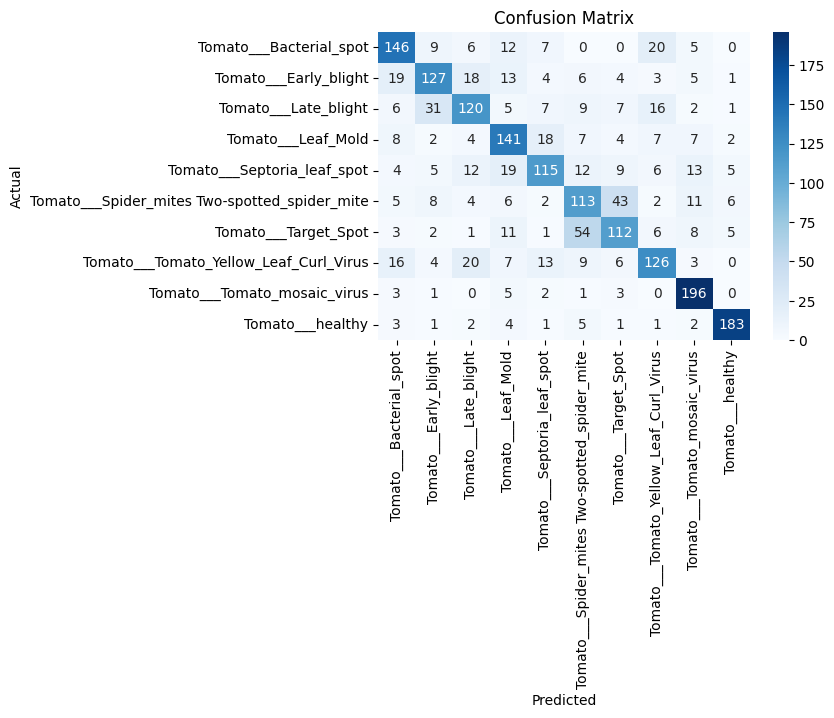

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.69      0.71      0.70       205
                        Tomato___Early_blight       0.67      0.64      0.65       200
                         Tomato___Late_blight       0.64      0.59      0.61       204
                           Tomato___Leaf_Mold       0.63      0.70      0.67       200
                  Tomato___Septoria_leaf_spot       0.68      0.57      0.62       200
Tomato___Spider_mites Two-spotted_spider_mite       0.52      0.56      0.54       200
                         Tomato___Target_Spot       0.59      0.55      0.57       203
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.67      0.62      0.64       204
                 Tomato___Tomato_mosaic_virus       0.78      0.93      0.85       211
                             Tomato___healthy       0.90      0.90      0.90       203

                                     accu

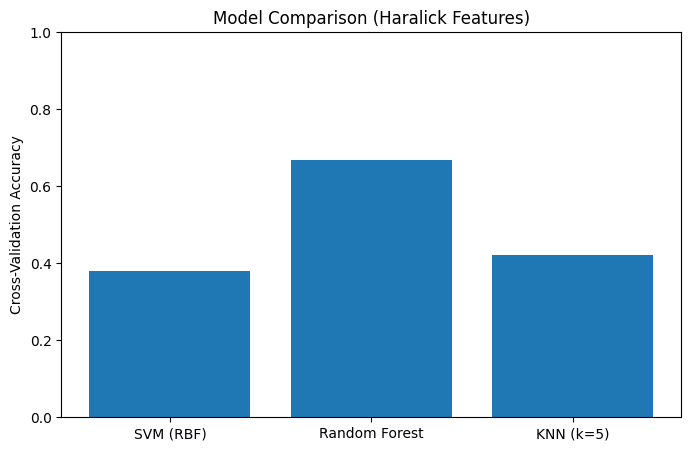

In [17]:
import numpy as np

model_names = list(results.keys())
mean_scores = [np.mean(results[m]) for m in model_names]

plt.figure(figsize=(8,5))
plt.bar(model_names, mean_scores)
plt.ylabel("Cross-Validation Accuracy")
plt.title("Model Comparison (Haralick Features)")
plt.ylim(0, 1)
plt.show()


# HOG Only feature pipeline

In [18]:
# =============================
# 0. Imports
# =============================
import os
import cv2
import numpy as np
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


# =============================
# 1. HOG Feature Extraction
# =============================
def hog_features(img_gray):
    features = hog(
        img_gray,
        orientations=9,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        transform_sqrt=True
    )
    return features


# =============================
# 2. Load Dataset + Extract HOG
# =============================
def load_dataset(path):
    X, y = [], []

    for label in os.listdir(path):
        class_dir = os.path.join(path, label)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (128, 128))

            hog_feat = hog_features(img_gray)

            X.append(hog_feat)
            y.append(label)

    return np.array(X), np.array(y)


# 🔁 CHANGE PATH IF NEEDED
dataset_path = "/content/drive/MyDrive/tomato/train"
X, y = load_dataset(dataset_path)

print("Dataset loaded")
print("Feature shape:", X.shape)


# =============================
# 3. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature Scaling (important for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =============================
# 4. Train Models
# =============================

# --- SVM (RBF) ---
svm = SVC(kernel="rbf", C=10, gamma="scale")
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# --- Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


# =============================
# 5. Evaluation Utilities
# =============================
def plot_cm(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


# =============================
# 6. Results
# =============================

# --- SVM ---
svm_cm = confusion_matrix(y_test, svm_pred)
plot_cm(svm_cm, "SVM (HOG) Confusion Matrix")
print("SVM Classification Report:\n")
print(classification_report(y_test, svm_pred))

# --- Random Forest ---
rf_cm = confusion_matrix(y_test, rf_pred)
plot_cm(rf_cm, "Random Forest (HOG) Confusion Matrix")
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))

# --- KNN ---
knn_cm = confusion_matrix(y_test, knn_pred)
plot_cm(knn_cm, "KNN (HOG) Confusion Matrix")
print("KNN Classification Report:\n")
print(classification_report(y_test, knn_pred))


KeyboardInterrupt: 

#  HOG+Haralick combined features

In [ ]:
# =============================
# 0. Imports
# =============================
import os
import cv2
import numpy as np
import mahotas
from skimage.feature import hog

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


# =============================
# 1. Feature Extraction
# =============================

# --- Haralick ---
def haralick_features(img_gray):
    return mahotas.features.haralick(img_gray).mean(axis=0)

# --- HOG ---
def hog_features(img_gray):
    return hog(
        img_gray,
        orientations=9,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        transform_sqrt=True
    )


# =============================
# 2. Load Dataset + Combined Features
# =============================
def load_dataset(path):
    X, y = [], []

    for label in os.listdir(path):
        class_dir = os.path.join(path, label)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (128, 128))

            har = haralick_features(img_gray)
            hogf = hog_features(img_gray)

            combined_features = np.concatenate([har, hogf])

            X.append(combined_features)
            y.append(label)

    return np.array(X), np.array(y)


# 🔁 CHANGE PATH IF NEEDED
dataset_path = "/content/drive/MyDrive/tomato/train"
X, y = load_dataset(dataset_path)

print("Dataset loaded")
print("Combined feature shape:", X.shape)


# =============================
# 3. Train-Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scaling (MANDATORY for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# =============================
# 4. Train Models (ALL 3)
# =============================

# --- SVM ---
svm = SVC(kernel="rbf", C=10, gamma="scale")
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# --- Random Forest ---
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


# =============================
# 5. Evaluation Utilities
# =============================
def plot_cm(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()


# =============================
# 6. Results
# =============================

# --- SVM ---
svm_cm = confusion_matrix(y_test, svm_pred)
plot_cm(svm_cm, "SVM (Haralick + HOG) Confusion Matrix")
print("SVM Classification Report:\n")
print(classification_report(y_test, svm_pred))

# --- Random Forest ---
rf_cm = confusion_matrix(y_test, rf_pred)
plot_cm(rf_cm, "Random Forest (Haralick + HOG) Confusion Matrix")
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))

# --- KNN ---
knn_cm = confusion_matrix(y_test, knn_pred)
plot_cm(knn_cm, "KNN (Haralick + HOG) Confusion Matrix")
print("KNN Classification Report:\n")
print(classification_report(y_test, knn_pred))
